<a href="https://colab.research.google.com/github/lowvey/CCADMACL_EXERCISES_COM232/blob/main/Exercise4b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4B

In this exercise, you will learn how to use PCA for dimensionality reduction to visualize clusters and then run a clustering algorithm.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True).frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
X = df.drop('target', axis=1)

1. Perform scaling `(10 pts)`

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

X_scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


2. Perform dimensionality reduction using PCA `(10 pts)`

In [30]:
pca = PCA(n_components=2)

X_reduced = pca.fit_transform(X_scaled)

3. Get the total explained variance `(5 pts)`

In [31]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

Explained variance of PC1 0.44272025607526366
Explained variance of PC2 0.18971182044033078


In [32]:
print("Total explained variance:", explained_variance.sum())

Total explained variance: 0.6324320765155944


4. Plot the explained variances of each principal component `(5 pts)`

Text(0, 0.5, 'Explained Variance')

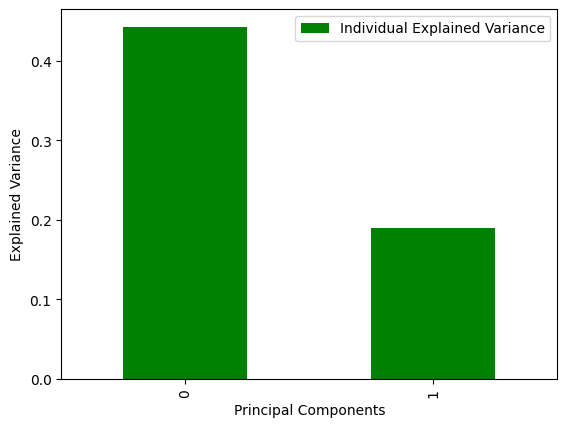

In [20]:
pd.DataFrame(explained_variance).plot.bar(color='green')
plt.legend(['Individual Explained Variance'])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

5. Visualize the dataset after PCA using a scatter plot `(5 pts)`

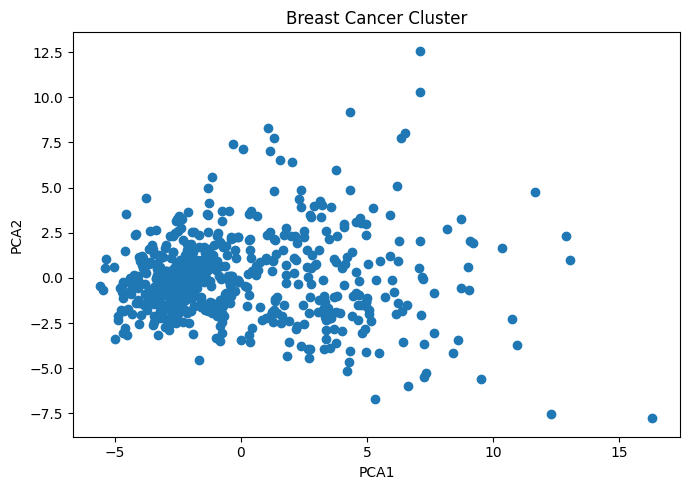

In [15]:
plt.figure(figsize=(7,5))

plt.scatter(X_reduced[:,0],X_reduced[:,1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Breast Cancer Cluster')
plt.tight_layout()

6. Perform clustering using any clustering algorithm `(10 pts)`

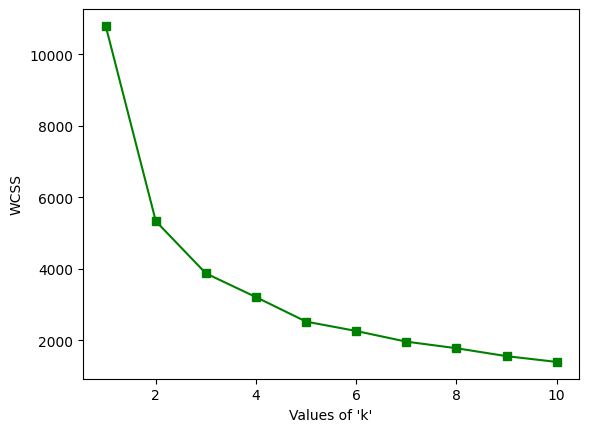

In [16]:
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_reduced)
    wcss[i] = kmeans.inertia_

plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [49]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(X_reduced)

KMeans(n_clusters=2)

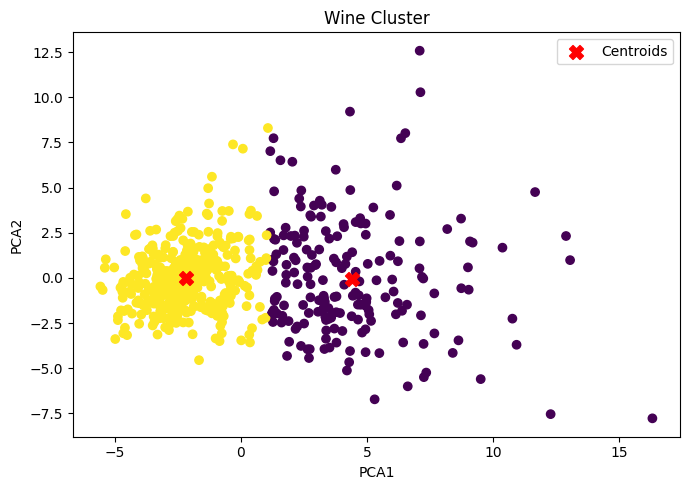

In [48]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=kmeans.labels_)
plt.scatter(centroids[:,0],centroids[:,1],marker='X',s=100,c='red', label='Centroids')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('Wine Cluster')
plt.tight_layout()

7. View the loading scores of each principal component `(5 pts)`

In [18]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df.columns.drop('target'))
loading_matrix

,PC1,PC2
mean radius,0.798469,-0.558394
mean texture,0.378346,-0.142564
mean perimeter,0.829965,-0.513800
mean area,0.806101,-0.551755
mean smoothness,0.520110,0.444392
mean compactness,0.872817,0.362680
mean concavity,0.942542,0.143660
mean concave points,0.951490,-0.083016
mean symmetry,0.503978,0.454506
mean fractal dimension,0.234772,0.875292


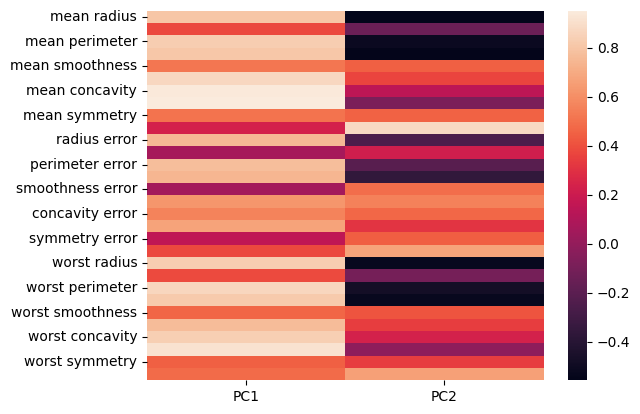

In [47]:
sns.heatmap(loading_matrix)
plt.show()